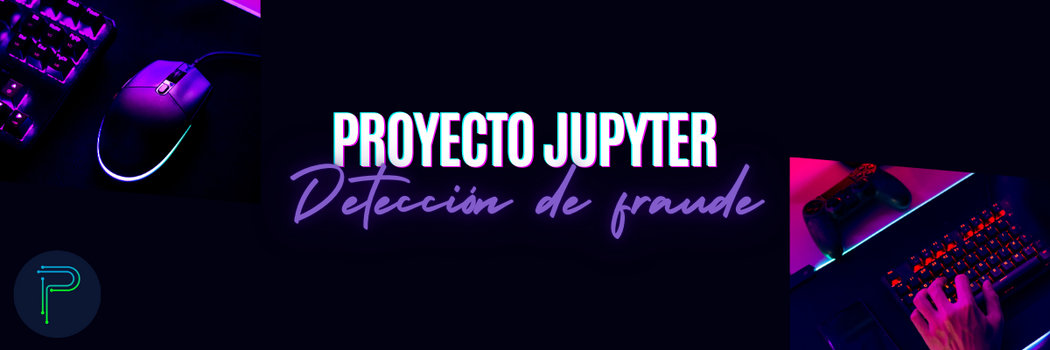

# 🚀 Descripción del proyecto

# 📚 Importación de librerías

In [ ]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# 🕵🏻 Diseño e implementación del Modelo Relacional

## 🐼 Exploración de Datos con Pandas

### Exploración de alarma_fraude.json

In [ ]:
# La ruta del archivo corresponde a mi ruta local, cambiar esto para obtener el mismo resultado.

df_alarma_fraude = pd.read_json(r"C:\Users\Germa\Documents\GitHub\Proyecto_Pontia\datos\alarma_fraude.json")

# La estructura del archivo es la siguiente: (como ejemplo, un registro)

# {
#     "2736446": {
#         "t_id": 2736446,
#         "mensaje_alarma": "Detectado_fraude"
#     }
# }

# Donde:
# - "2736446" es una clave en el diccionario principal.
# - El valor asociado es otro diccionario con:
#     - "t_id": 2736446
#     - "mensaje_alarma": "Detectado_fraude"

In [ ]:
df_alarma_fraude = pd.json_normalize(df_alarma_fraude)

print(df_alarma_fraude)

In [ ]:
# Leemos los datos del JSON con "with open" antes de trabajar con dataframe y los asignamos a la variable datos:

with open(r"C:\Users\Germa\Documents\GitHub\Proyecto_Pontia\datos\alarma_fraude.json", mode = 'r') as f:
    datos_alarma_fraude = json.load(f)

datos_alarma_fraude # Vemos la estructura de datos mencionada anteriormente:

In [ ]:
# Creación del bucle para crear la lista de diccionarios:

registros = []

for clave, valor in datos_alarma_fraude.items():
    registro = {'id':clave}
    registro.update(valor)
    registros.append(registro)

# Creación del DataFrame a partir de la lista de registros:

df_alarma_fraude = pd.DataFrame(registros)

In [ ]:
df_alarma_fraude.head()

In [ ]:
# Realizamos la conversión del tipo de datos:

df_alarma_fraude['id'] = df_alarma_fraude['id'].astype(int)

# Comparamos ambas columnas:

son_iguales = (df_alarma_fraude['id'] == df_alarma_fraude['t_id']).all()

print(f"Los datos de la columna 'id' y 't_id' son iguales: {son_iguales}.")

In [ ]:
df_alarma_fraude.drop(columns='id', inplace=True)

df_alarma_fraude.head()

### Exploración de balances.json

In [ ]:
# Nombre del archivo JSON en la misma carpeta que el notebook
path = 'balances.json'

In [ ]:
try:
    # Intentar cargar el archivo JSON
    with open(path, 'r', encoding='utf-8') as file:
        df = json.load(file)
    print("Fichero JSON cargado")
    
    # Verificamos el tipo de datos cargados
    print(f"Tipo de datos cargados: {type(df)}")
    
    # Si es un diccionario
    if isinstance(df, dict):
        print("Estructura del diccionario:")
        print(f"Claves del diccionario: {list(df.keys())[:5]}")  # Mostramos las primeras 5 claves

        # Verificamos una de las claves y su estructura
        sample_key = list(df.keys())[0]  # Tomamos la primera clave como ejemplo
        record = df[sample_key]
        print(f"Estructura del primer registro de la clave '{sample_key}':", record)

except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

Cargamos el JSON que esta compuesto por listas de diccionario. 

Cada diccionario tiene 3 valores t_id, balance_prev y balance_post, pero hay registros que para una misma clave tienen una lista de unos 15 diccionarios, por eso no los puede leer bien directamente.

In [ ]:
 # Crear la lista para almacenar todos los registros
all_records = []

# Recorremos todas las claves y sus valores (listas de diccionarios)
for key, value in df.items():
    # Verifica si el valor es una lista de registros
    if isinstance(value, list):
        for record in value:
            record['key'] = key  # Añade la clave como columna adicional
            all_records.append(record)
    else:
        print(f"Advertencia: El valor asociado a la clave {key} no es una lista")

# Crear el DataFrame
df = pd.DataFrame(all_records)
print("DataFrame creado correctamente")

In [ ]:
 # Mostrar información del DataFrame
print("Primeros registros del DataFrame:")
print(df.head())  # Primeros 5 registros
print("Dimensiones del DataFrame:", df.shape)  # Número de filas y columnas
print("Información del DataFrame:")
print(df.info())  # Información detallada sobre el DataFrame

El data frame tiene las encabezados 

- t-id (transaction ID)
- balance_prev (saldo anterior)
- balance_post (saldo después)
- key (todavía no sabemos que es, supongo el código de la transacción)

In [ ]:
# Agregar la columna "difference" (balance_prev - balance_post)
if 'balance_prev' in df.columns and 'balance_post' in df.columns:
    df['difference'] = df['balance_prev'] - df['balance_post']
    print("Columna 'difference' agregada correctamente")
else:
    print("No se encontraron las columnas 'balance_prev' o 'balance_post' en los datos")

He añadido una nueva columna llamada "difference", que representa la diferencia entre los valores de las columnas balance_post y balance_past, de la siguiente manera:

            balance_post - balance_past = difference

Entiendo que en otro archivo también se calcula la diferencia, por lo que debemos verificar que dicha diferencia siempre sea el resultado de la fórmula balance_post - balance_past. Si esto no se cumple, indicaría que se trata de una transacción fraudulenta.

In [ ]:
# Verificar la nueva columna
print("Primeros registros con la columna 'difference':")
print(df[['balance_prev', 'balance_post', 'difference']].head())  # Mostrar solo las columnas relevantes

In [ ]:
# Verificar si hay valores nulos en las columnas
print("Valores nulos por columna:")
print(df.isnull().sum())  # Número de valores nulos por columna

In [ ]:
# Verificar los tipos de datos en las columnas
print("Tipos de datos por columna:")
print(df.dtypes)  # Tipos de datos en cada columna

In [ ]:
# Verificar las estadísticas descriptivas de las columnas numéricas
print("Estadísticas descriptivas del DataFrame:")
print(df.describe())  # Estadísticas de las columnas numéricas

Conclusión:

El análisis de las estadísticas descriptivas muestra que las columnas balance_prev y balance_post tienen una amplia variabilidad, con promedios de 967,292 y 1,040,055, respectivamente. La columna difference tiene un promedio negativo de -72,762, indicando que, en general, el balance posterior es ligeramente mayor que el previo. Sin embargo, la desviación estándar alta en balance_prev y balance_post sugiere una gran dispersión de valores.

Los valores extremos, como el máximo de 356 millones en balance_post, podrían indicar registros atípicos que requieren revisión. La mayoría de las diferencias están cerca de cero, lo que sugiere que los saldos no varían significativamente entre transacciones. En resumen, aunque los datos muestran cierta dispersión, la tendencia general es que el balance posterior es más alto que el anterior, con algunas transacciones que podrían necesitar un análisis más detallado.

In [ ]:
import json

try:
    # Intentar cargar el archivo JSON
    with open(path, 'r', encoding='utf-8') as file:
        df = json.load(file)
    print("Fichero JSON cargado")
    
    # Verificamos el tipo de datos cargados
    print(f"Tipo de datos cargados: {type(df)}")
    
    # Si es un diccionario
    if isinstance(df, dict):
        print("Estructura del diccionario:")
        print(f"Claves del diccionario: {list(df.keys())[:5]}")  # Mostramos las primeras 5 claves

        # Verificamos una de las claves y su estructura
        sample_key = list(df.keys())[0]  # Tomamos la primera clave como ejemplo
        record = df[sample_key]
        print(f"Estructura del primer registro de la clave '{sample_key}':", record)

    else:
        print("El archivo JSON no es un diccionario. Es de tipo:", type(df))

except FileNotFoundError:
    print(f"El archivo {path} no se encuentra. Verifique la ruta.")
except json.JSONDecodeError:
    print("Error al decodificar el archivo JSON. Verifique su formato.")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")


In [ ]:
# Direccion de archivo
url = r'C:\Users\Joan\Desktop\Pontia\Jupyter\Detección de Fraude\es_fraude.json'

# leer el archivo json
with open(url, 'r') as archivo:
    data = json.load(archivo)

# convertir el archivo a dataframe y renombrar columnas
df = pd.DataFrame(list(data.items()), columns=['fraude_id', 'es_fraude'])

# informacion de datos
df.info()
print('\n')

print(df.shape)
print('\n')

# cantidad de False
cantidad_false = (df['es_fraude'] == False).sum()
print(f'La cantidad de casos sin fraude es de: {cantidad_false}')
print('\n')

# cantidad de False
cantidad_true = (df['es_fraude'] == True).sum()
print(f'La cantidad de casos con fraude es de: {cantidad_true}')
print('\n')

# promedio fraude (se calcula de la siguiente manera ya que python interpreta el True como 1 y el false como 0)
promedio_fraude = (df['es_fraude'].mean())
print(f'El promedio de casos de fraude es de: {promedio_fraude}')
print('\n')

# impresion de df
print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362520 entries, 0 to 6362519
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   fraude_id  object
 1   es_fraude  bool  
dtypes: bool(1), object(1)
memory usage: 54.6+ MB


(6362520, 2)


La cantidad de casos sin fraude es de: 6354311


La cantidad de casos con fraude es de: 8209


El promedio de casos de fraude es de: 0.0012902120543432476


        fraude_id  es_fraude
0               0      False
1               1      False
2               2       True
3               3       True
4               4      False
...           ...        ...
6362515   6362615       True
6362516   6362616       True
6362517   6362617       True
6362518   6362618       True
6362519   6362619       True

[6362520 rows x 2 columns]


Con los datos obtenidos llegamos a la conclusion de que la cantidad de casos de fraude es poco significativa,
lo que nos hace ver que las medidas de seguridad están funcionando correctamente.
